<a href="https://colab.research.google.com/github/sydstewart/Orders/blob/main/LookupDataframe_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Percent  Value
0      0.0      1
1     60.7     10
2     77.3     20
3     86.2     30
4     90.6     40
5     93.2     50
6     94.5     60
7     96.1     70
8     97.1     80
9    100.0    100
Randomly chosen Percent= 49
Row Below index = 0
Row above index = 1
Row Below percent = 0.0
Row above percent = 60.7
Row Below value = 1
Row above value = 10

Percent Diff below random percent= 49.0 ( 49 - 0.0 )
Percent Diff below between below and above percent= 60.7 ( 60.7 - 0.0 )
Value Difference between below and above 9 ( 10 - 1 )

Interpolated Value= 8    ((( 49.0 ) / ( 60.7 )) * ( 9 ))  + 1


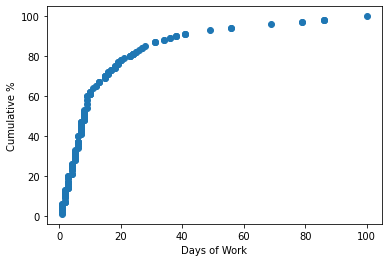

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

# ---------------------------Dataframe of project distribution -----------------------------------------------
# df = pd.DataFrame([[0,100],[60.7, 4992 ], [77.3, 9998 ], [86.2, 14574 ],[90.6,19448],[93.2,24420],[94.5,29030],[96.1,34850],[97.1,39900],[100,88000]],  columns=('Percent', 'Value'))
df = pd.DataFrame([[0,1],[60.7, 10 ], [77.3, 20 ], [86.2, 30 ],[90.6,40],[93.2,50],[94.5,60],[96.1,70],[97.1,80],[100,100]],  columns=('Percent', 'Value'))

print(df)
i = 1
randarray = []
interparray = []
while i < 180:

        #--------------Enter Randon Percent between 1 and 100 -------------------
        n = random.randint(1,100)
        if n == 0:
          print('n has to be between 1 and 100 - has been set to 1')
          n = 1
        randarray.append(n)
        #------------------Find index below random percent --------------------
        
        dfb = df[ df['Percent']<n ].index.values.astype(int)  # find rows below n
        rowbelowid = len(dfb)-1   # last value in dfb list
        # print (dfb)
        # print(rowbelowid)

        #------------------Find index above random percent --------------------

        dfa = df[ df['Percent']>=n ].index.values.astype(int)   # find rows above n
        # print(dfa)

        rowaboveid = dfa[0]   # first value in dfa list
        # print(rowaboveid)



        #-----------------------------Prep for Interpolation ----------------------
        rowvalue_above = df.at[rowaboveid,'Value']
        rowpercent_above = df.at[rowaboveid,'Percent']
        rowvalue_below = df.at[rowbelowid,'Value']
        rowpercent_below = df.at[rowbelowid,'Percent']
        interpvalue = (n - rowpercent_below )* (rowvalue_above - rowvalue_below ) /(rowpercent_above - rowpercent_below) + rowvalue_below 
        interpvalue = int(interpvalue)
        interparray.append(interpvalue)
        i += 1
# ----------------work out percents and values above and below-----------------
print('==============================================')
print('Randomly chosen Percent=', n)
print('Row Below index =',rowbelowid)
print('Row above index =',rowaboveid)
print('Row Below percent =',df.at[rowbelowid,'Percent'])
print('Row above percent =',df.at[rowaboveid,'Percent'])

print('Row Below value =',df.at[rowbelowid,'Value'])
print('Row above value =',df.at[rowaboveid,'Value'])

diffPercentbelow = round(n - df.at[rowbelowid,'Percent'],1)
diffPercentbetweenupperandlower = round(df.at[rowaboveid,'Percent'] - df.at[rowbelowid,'Percent'],1)
differenceValuebetweenupperandlower = rowvalue_above - rowvalue_below
print('')


#-----------------------------Prints for Interpolation calc ----------------------
print('Percent Diff below random percent=',diffPercentbelow,'(', n, '-',rowpercent_below,')')
print('Percent Diff below between below and above percent=', diffPercentbetweenupperandlower,'(', df.at[rowaboveid,'Percent'] , '-',rowpercent_below,')')
print('Value Difference between below and above', rowvalue_above - rowvalue_below,'(',df.at[rowaboveid,'Value'],'-', df.at[rowbelowid,'Value'],')')


#------------------------------Interpolation Calc -----------------------------
interpvalue = (n - rowpercent_below )* (rowvalue_above - rowvalue_below ) /(rowpercent_above - rowpercent_below) + rowvalue_below 
interpvalue = int(interpvalue)
print('')
print('==============================================')
print('Interpolated Value=', interpvalue,'   (((',diffPercentbelow ,')','/','(', diffPercentbetweenupperandlower,'))', '*','(',differenceValuebetweenupperandlower,'))', ' +',rowvalue_below)
print('==============================================')


plt.ylabel("Cumulative %")
plt.xlabel("Days of Work")

plt.scatter( interparray, randarray, label = ' Days Work for Projects')



